In [2]:
"""
The first step to Keras

This is modified version of the tutorial code in the Book "Deep Learning with Python"
Copyright 2017 by Manning Publications, Co.
https://github.com/fchollet/deep-learning-with-python-notebooks
Copyright: Copyright (c) 2017 François Chollet
"""
import os, shutil

# original dataset
original_dataset_dir = '/home/vs/kaggle_original_data/train'

# small dataset
base_dir = '~/cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

# training / validation / test dataset
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# training cat images
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

# training dog images
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

# validation cat images
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

# validation dog images
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

# test cat images
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

# test dog images
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# copy the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# copy the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [5]:
# define the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# rescale 1/255 every image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
# fit the generator
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 205s 2s/step - loss: 0.6913 - acc: 0.5265 - val_loss: 0.6730 - val_acc: 0.5980
Epoch 2/30
100/100 [==============================] - 182s 2s/step - loss: 0.6597 - acc: 0.6000 - val_loss: 0.6465 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 178s 2s/step - loss: 0.6050 - acc: 0.6650 - val_loss: 0.5980 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 162s 2s/step - loss: 0.5633 - acc: 0.7005 - val_loss: 0.6134 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 159s 2s/step - loss: 0.5352 - acc: 0.7260 - val_loss: 0.7125 - val_acc: 0.5970
Epoch 6/30
100/100 [==============================] - 181s 2s/step - loss: 0.5035 - acc: 0.7565 - val_loss: 0.6053 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 179s 2s/step - loss: 0.4749 - acc: 0.7730 - val_loss: 0.5734 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 162s 2s/step - 

In [13]:
# save the model
model.save('cats_and_dogs_small_1.h5')

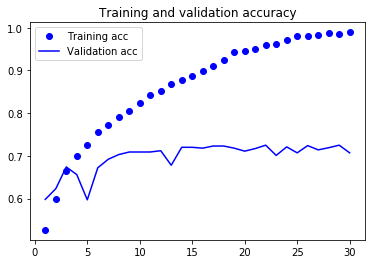

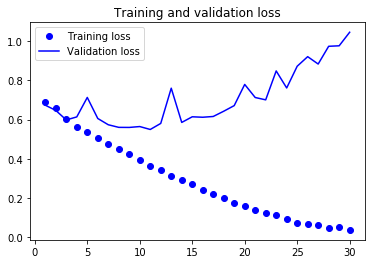

In [14]:
# plot the result
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# plot loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# data augmentation generator
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

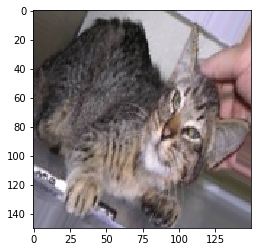

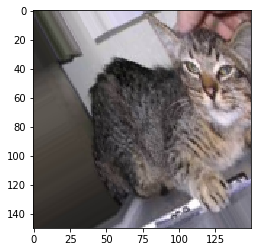

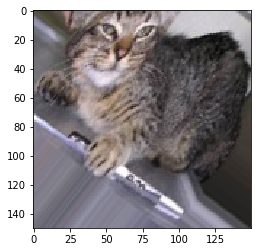

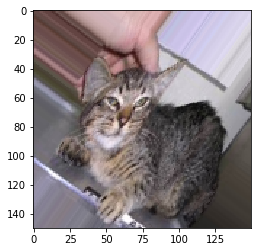

In [20]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[2]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
# new model added dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [23]:
# generator
train_datagen = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# fit the generator
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 447s 4s/step - loss: 0.6932 - acc: 0.5084 - val_loss: 0.7028 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 367s 4s/step - loss: 0.6828 - acc: 0.5634 - val_loss: 0.6747 - val_acc: 0.5520
Epoch 3/100
100/100 [==============================] - 360s 4s/step - loss: 0.6665 - acc: 0.5978 - val_loss: 0.6945 - val_acc: 0.5450
Epoch 4/100
100/100 [==============================] - 292s 3s/step - loss: 0.6433 - acc: 0.6228 - val_loss: 0.6214 - val_acc: 0.6370
Epoch 5/100
100/100 [==============================] - 312s 3s/step - loss: 0.6299 - acc: 0.6513 - val_loss: 0.5956 - val_acc: 0.6700
Epoch 6/100
100/100 [==============================] - 281s 3s/step - loss: 0.6208 - acc: 0.6475 - val_loss: 0.6291 - val_acc: 0.6200
Epoch 7/100
100/100 [==============================] - 341s 3s/step - loss: 0.6059 - acc: 0.6572 - val_loss: 0.5

100/100 [==============================] - 225s 2s/step - loss: 0.4101 - acc: 0.8078 - val_loss: 0.4323 - val_acc: 0.8030
Epoch 62/100
100/100 [==============================] - 225s 2s/step - loss: 0.4014 - acc: 0.8188 - val_loss: 0.4480 - val_acc: 0.7990
Epoch 63/100
100/100 [==============================] - 237s 2s/step - loss: 0.3846 - acc: 0.8266 - val_loss: 0.4522 - val_acc: 0.7910
Epoch 64/100
100/100 [==============================] - 250s 2s/step - loss: 0.4014 - acc: 0.8153 - val_loss: 0.5175 - val_acc: 0.7920
Epoch 65/100
100/100 [==============================] - 239s 2s/step - loss: 0.3902 - acc: 0.8259 - val_loss: 0.4486 - val_acc: 0.8030
Epoch 66/100
100/100 [==============================] - 248s 2s/step - loss: 0.3838 - acc: 0.8272 - val_loss: 0.4327 - val_acc: 0.8030
Epoch 67/100
100/100 [==============================] - 276s 3s/step - loss: 0.3941 - acc: 0.8178 - val_loss: 0.4405 - val_acc: 0.8100
Epoch 68/100
100/100 [==============================] - 225s 2s/step

In [24]:
# save the model
model.save('cats_and_dogs_small_2.h5')